In [7]:
import numpy as np


side = 1000
heights = np.zeros((side, side))
points = [(a,b) for a in range(side) for b in range(side)]
shift = side/10

def distance(pointA, pointB):
    dx = min(abs(pointA[0] - pointB[0]), side - abs(pointA[0] - pointB[0]))
    dy = min(abs(pointA[1] - pointB[1]), side - abs(pointA[1] - pointB[1]))
    return (dx**2 + dy**2)**0.5

def genPlates(n = 10):
    centroids = np.round(np.random.rand(n, 2)*side)
    ids = np.array([np.argmin([distance(point, centroid) for centroid in centroids]) for point in points]).reshape(side,side)
    return ids, centroids

num_plates = 10
ids, centroids = genPlates(num_plates)
typ = np.random.randint(2, size=num_plates)


def genShifts(n = 10):
    shifts = np.round(np.random.rand(n, 2)*shift)
    return shifts

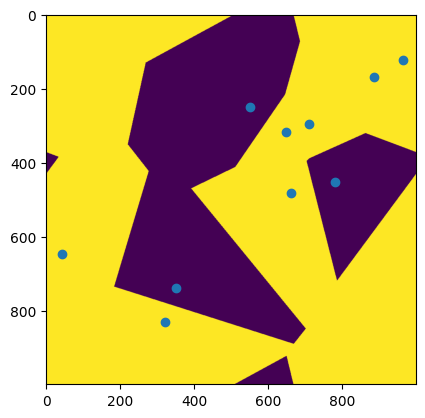

In [8]:

for point in points:
    if typ[ids[point[0], point[1]]] == 0:
        heights[point[0], point[1]] = 1
    else:
        heights[point[0], point[1]] = 2



import matplotlib.pyplot as plt
plt.imshow(heights, cmap='viridis')  
plt.scatter(centroids.T[1], centroids.T[0])
plt.show()


In [24]:
shifts = genShifts(num_plates)
new_heights = np.zeros((side, side))

for point in points:
    shift = shifts[ids[point]]
    new_point = (int(point[0]+shift[0])%side, int(point[1]+shift[1])%side)
    new_heights[new_point[0], new_point[1]] += heights[point[0], point[1]]

for i, shift in enumerate(shifts):
    centroids[i][0] += shift[0]
    centroids[i][0] %= side
    centroids[i][1] += shift[1]
    centroids[i][1] %= side

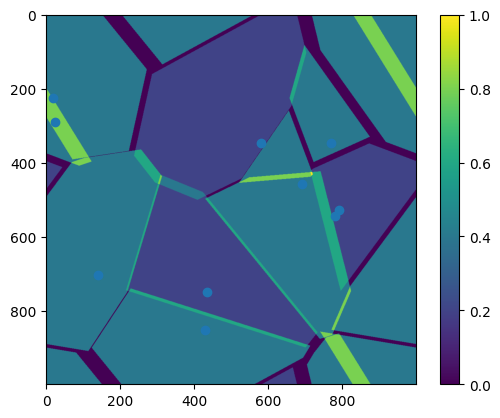

In [25]:
plt.imshow(new_heights, cmap='viridis')  
plt.scatter(centroids.T[1], centroids.T[0])
plt.colorbar()
plt.show()

In [54]:
heights = np.copy(new_heights)


def smooth(heigths=new_heights, window=side/10, iterations=10):
    curvatures = np.zeros((side,side))
    for point in points:
        x=point[0]
        y=point[1]
        curvature = 0
        for i in range(iterations):
            curvature += (new_heights[(x-i-1)%side, y]+new_heights[(x+i+1)%side, y] -2*new_heights[x, y])/(i+1)
            curvature += (new_heights[x, (y-i-1)%side]+new_heights[x, (y+1+i)%side] -2*new_heights[x,y] )/(i+1)
        curvatures[point[0], point[1]] = curvature

        heights[point[0], point[1]] += curvature*0.3*np.random.rand()

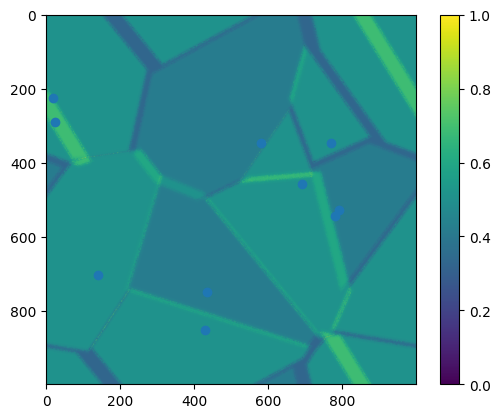

In [55]:
smooth()

plt.imshow(heights, cmap='viridis')  
plt.scatter(centroids.T[1], centroids.T[0])
plt.colorbar()
plt.show()